# Proyecto de Aplicación Personal 

## Optimización De Programas de Inversión para Intermediarios Financieros
## -Capital de Riesgo-



![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Logo-ITESO-Principal-60V.png/250px-Logo-ITESO-Principal-60V.png)



### Integrantes:
### Juan Antonio Flores 
### Jazmín Calderón
### Diana Chávez

In [0]:
#Librerías
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics 
from statistics import stdev
from fractions import Fraction as fr 
from matplotlib import rc
import statsmodels 
import seaborn as sns
import scipy.stats as stats
import locale
import matplotlib
%matplotlib inline


# Medidas de Desempeño

## Rendimiento

In [67]:
rtns_anuales = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/rtnsanuales-q42017.csv')
dfr = rtns_anuales
dfr.index.name = 'VC'
dfr

,Quarter Ending,Year,Horizon Return,RND,Years,Annualized return,Annualized STD,Unnamed: 7
VC,,,,,,,,
0,Q1,1997.0,-0.15,-96.333333,1997.0,31.34,7.557559,NaN
1,Q2,1997.0,14.30,-0.001399,NaN,NaN,NaN,NaN
2,Q3,1997.0,14.28,-0.796218,NaN,NaN,NaN,NaN
3,Q4,1997.0,2.91,2.467354,NaN,NaN,NaN,NaN
4,Q1,1998.0,10.09,-0.470763,1998.0,28.53,7.268693,NaN
5,Q2,1998.0,5.34,-1.372659,NaN,NaN,NaN,NaN
6,Q3,1998.0,-1.99,-8.582915,NaN,NaN,NaN,NaN
7,Q4,1998.0,15.09,0.284294,NaN,NaN,NaN,NaN
8,Q1,1999.0,19.38,0.993292,1999.0,171.01,28.612102,NaN


In [0]:

ds_r = dfr['Annualized return']

## Valor esperado del rendimiento

In [69]:

ds_m = dfr['Annualized return'].mean()
ds_m

14.550952380952383

## Desviación Estándar

In [70]:

ds_ds = dfr['Annualized STD'].mean()
ds_ds

5.5037116033333335

## Indice de Sharpe

In [71]:
One_Year_Treasury_Bill_Rate = 2.25
OYTBR = One_Year_Treasury_Bill_Rate
OYTBR1 = One_Year_Treasury_Bill_Rate / 100
Sharpe = ( ds_m - OYTBR ) / ds_ds
Sharpe

2.235028516665424

## Indice $ M^2$

In [72]:
rend_merc = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/Rend_merc1.csv')
rm = rend_merc
rm.index.name = 'Dow Jones'
rm

,Año,Rendimiento anual,Rendimiento anual (%)
Dow Jones,,,
0,1997,-0.000594,-0.059358
1,1998,-0.000555,-0.055544
2,1999,-0.000564,-0.056393
3,2000,0.000169,0.016934
4,2001,0.000521,0.052142
5,2002,0.000809,0.080934
6,2003,-0.000980,-0.098030
7,2004,0.000030,0.003000
8,2005,-0.000131,-0.013127


In [73]:

rmm = rm['Rendimiento anual (%)'].mean()
rmd = rm['Rendimiento anual (%)']
rmds = rmd.std()
rp = OYTBR*(1-(rmds/ds_ds)) + ds_m*(rmds/ds_ds)
M = rp - rmm
M

2.5079171692053466

## Medidas individuales 

In [85]:
oneytr = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/1YTR.csv')
oneytr

,Año,1_Year_Treasury_Rate_(%)
0,1996,5.85
1,1997,5.59
2,1998,5.35
3,1999,5.08
4,2000,6.19
5,2001,3.53
6,2002,1.97
7,2003,1.07
8,2004,2.14
9,2005,3.61


In [95]:
mi = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/med_des.csv')
mi

,Año,VC en operación,Rendimiento %,Volatilidad (%)
0,1996.0,40.0,31.34,7.557559
1,1997.0,71.0,28.53,7.268693
2,1998.0,81.0,171.01,28.612102
3,1999.0,110.0,23.90,20.423797
4,2000.0,156.0,-47.34,5.074580
5,2001.0,56.0,-39.04,1.093648
6,2002.0,33.0,-3.99,2.377062
7,2003.0,40.0,14.53,3.369761
8,2004.0,67.0,5.94,2.364523
9,2005.0,65.0,16.42,3.804598


In [0]:
ren_an = mi['Rendimiento %']
tlr = oneytr['1_Year_Treasury_Rate_(%)']
std_p = mi['Volatilidad (%)']
std_mer = rm['Rendimiento anual (%)']
ren_p = mi['Rendimiento %']

In [0]:
sharpevc = []
for i in range(21):
    sharpevc.append((ren_an[i]-tlr[i])/std_p[i])



In [102]:
rp_m2 = []
for i in range (21):
    mm2 = (tlr[i] * (1-(std_mer[i]/std_p[i]))) + (ren_p[i] * (std_mer/std_p[i]))
    rp_m2.append(mm2)
m2

[Dow Jones
 0     5.649800
 1     5.665612
 2     5.662094
 3     5.966170
 4     6.112173
 5     6.231566
 6     5.489429
 7     5.908387
 8     5.841512
 9     5.677552
 10    5.917925
 11    6.947144
 12    5.210939
 13    5.649079
 14    5.833407
 15    5.774280
 16    5.672948
 17    5.711753
 18    6.084123
 19    5.522043
 20    7.361828
 Name: Rendimiento anual (%), dtype: float64, Dow Jones
 0     5.399735
 1     5.414702
 2     5.411371
 3     5.699184
 4     5.837379
 5     5.950386
 6     5.247942
 7     5.644492
 8     5.581194
 9     5.426003
 10    5.653519
 11    6.627692
 12    4.984346
 13    5.399052
 14    5.573522
 15    5.517557
 16    5.421645
 17    5.458375
 18    5.810828
 19    5.278811
 20    7.020197
 Name: Rendimiento anual (%), dtype: float64, Dow Jones
 0     5.005774
 1     5.028564
 2     5.023493
 3     5.461758
 4     5.672192
 5     5.844272
 6     4.774632
 7     5.378475
 8     5.282089
 9     5.045773
 10    5.392222
 11    6.875635
 12    4.3732

## Plots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


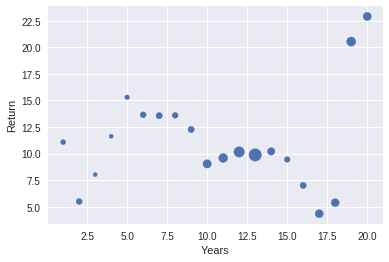

In [61]:
n_f = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/n_f.csv')
n_f.plot.scatter('Years', 'Return', s=n_f.Funds)

In [0]:
c = n_f
cmap= np.meshgrid(np.array(range(0, 25)), np.array(range(0, 150)))
cmap = c

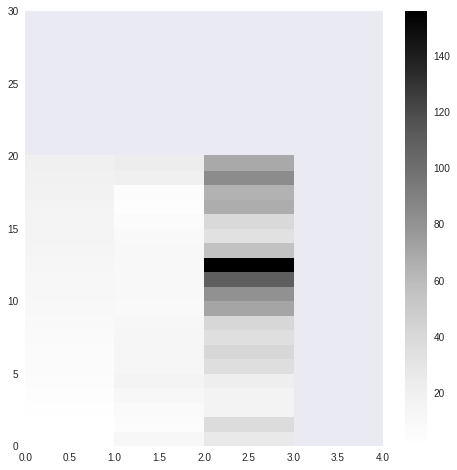

In [43]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im = ax.pcolormesh(cmap)
fig.colorbar(im, ax=ax)

In [0]:
rtns_anuales1 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/BD%20Capital%20de%20Riesgo/rtb_an_cdr.csv')
dfr2 = rtns_anuales1


In [0]:
a_vc = []
for i in range(1986,2016):
    a_vc.append(1+i)

In [0]:
dfr1 = dfr2.drop(columns = ['Years'])
dfr1 = dfr1.fillna(0)

In [0]:
vegetables =a_vc
farmers = ["Rendimiento"]

harvest = np.array([dfr1.iloc[0],dfr1.iloc[1],dfr1.iloc[2],dfr1.iloc[3],dfr1.iloc[4],
                   dfr1.iloc[5],dfr1.iloc[6],dfr1.iloc[7],dfr1.iloc[8],dfr1.iloc[9],
                   dfr1.iloc[10],dfr1.iloc[11],dfr1.iloc[12],dfr1.iloc[13],dfr1.iloc[14],
                   dfr1.iloc[15],dfr1.iloc[16],dfr1.iloc[17],dfr1.iloc[18],dfr1.iloc[19]])

In [0]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
        
        # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



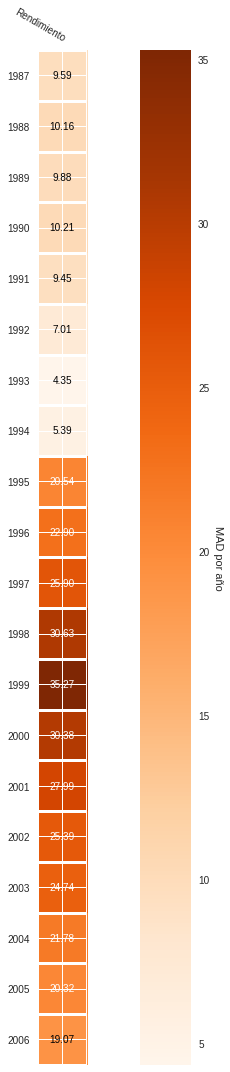

In [53]:
fig, ax = plt.subplots(figsize=(15,15))

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="Oranges", cbarlabel="MAD por año")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()

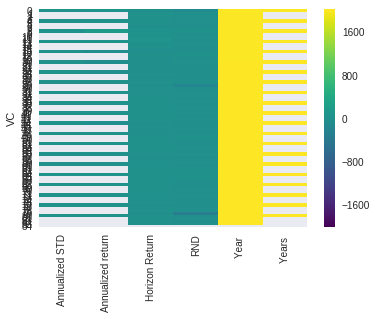

In [103]:
dff = dfr
heatmap2_data = pd.pivot_table(dff,values=None, index=['VC'])
heatmap2_data.head(n=25)
sns.heatmap(heatmap2_data, cmap="viridis")